In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns

import matplotlib.pyplot as plt

import plotly_express as px

from scipy import stats
from scipy.stats import norm, skew 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df_train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
f=open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt")
data_description=f.read()
sample_sub=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [3]:
ids=df_test['Id']
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
df_train_corr=df_train.corr()

In [5]:
df_train_corr[['SalePrice']].sort_values(by='SalePrice',ascending=False).style.background_gradient(cmap="coolwarm",axis=None)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [6]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

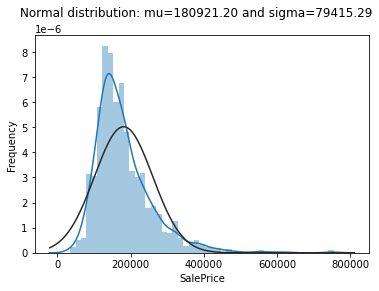

In [7]:
sns.distplot(df_train['SalePrice'],fit=norm);

(mu,sigma)=norm.fit(df_train['SalePrice'])
plt.suptitle("Normal distribution: mu={:.2f} and sigma={:.2f}".format(mu,sigma))
plt.ylabel('Frequency')

<AxesSubplot:>

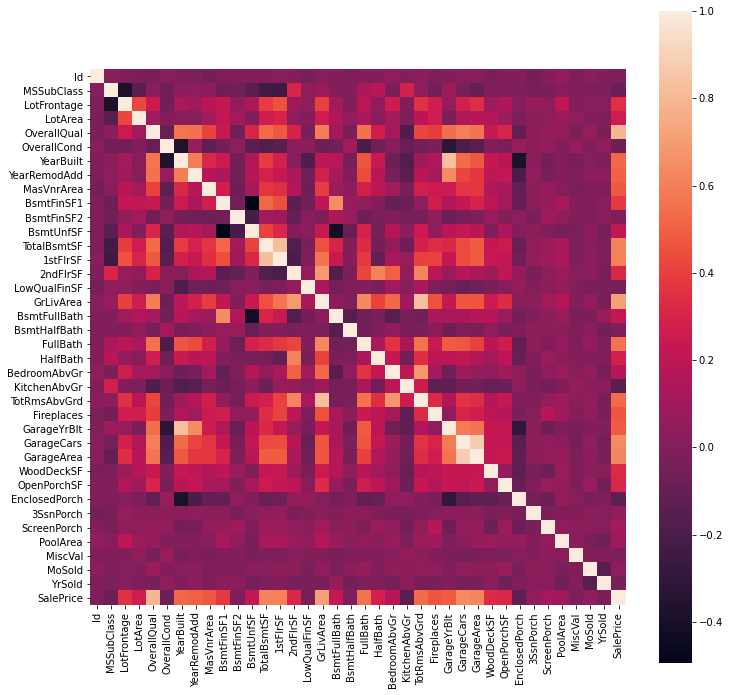

In [8]:
plt.figure(figsize=(12,12))
sns.heatmap(df_train_corr,xticklabels=df_train_corr.columns.values,yticklabels=df_train_corr.columns.values,vmax=1,square=True)

Text(0.5, 1.0, "'GarageArea vs SalePrice'")

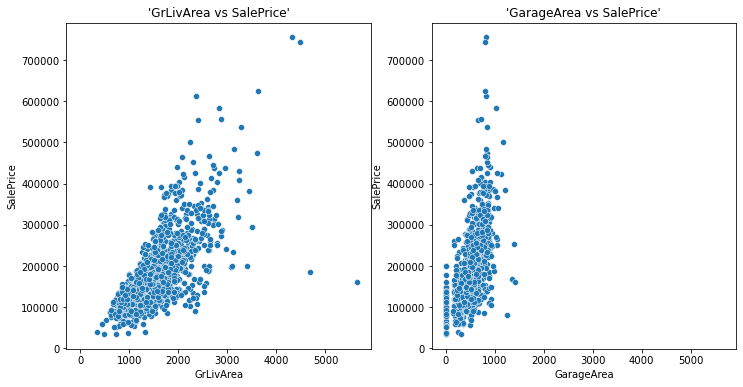

In [9]:
fig, axes = plt.subplots(1,2,sharex=True,figsize=(12,6))

sns.scatterplot(data=df_train,ax=axes[0],x='GrLivArea',y='SalePrice').set_title("'GrLivArea vs SalePrice'")
sns.scatterplot(data=df_train,ax=axes[1],x='GarageArea',y='SalePrice').set_title("'GarageArea vs SalePrice'")


Text(0.5, 1.0, "1stFlrSF vs SalePrice'")

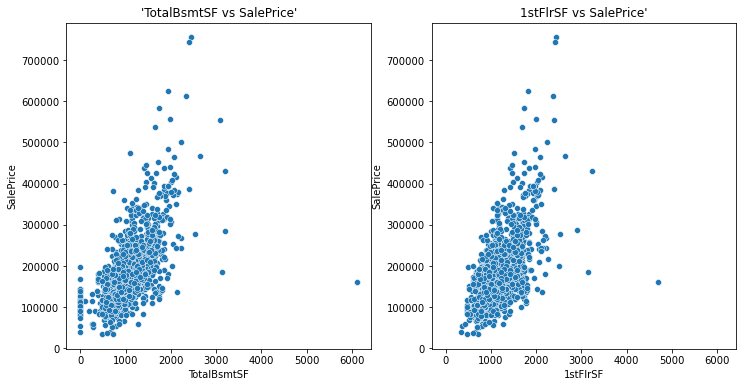

In [10]:
fig, axes = plt.subplots(1,2,sharex=True,figsize=(12,6))

sns.scatterplot(data=df_train,ax=axes[0],x='TotalBsmtSF',y='SalePrice').set_title("'TotalBsmtSF vs SalePrice'")
sns.scatterplot(data=df_train,ax=axes[1],x='1stFlrSF',y='SalePrice').set_title("1stFlrSF vs SalePrice'")


Text(0.5, 1.0, 'GarageCars vs SalePrice')

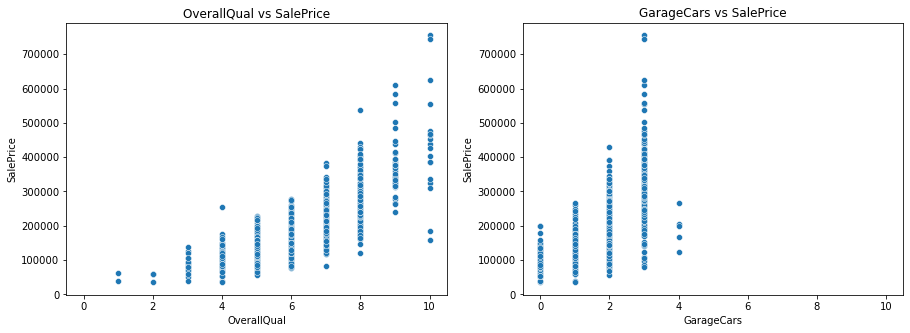

In [11]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))


sns.scatterplot(data=df_train, ax=axes[0], x='OverallQual', y='SalePrice')
axes[0].set_title('OverallQual vs SalePrice')
sns.scatterplot(data=df_train, ax=axes[1], x='GarageCars', y='SalePrice')
axes[1].set_title('GarageCars vs SalePrice')

In [12]:
plt.figure(figsize=(8,6))
px.box(df_train[['ExterQual', 'SalePrice']].sort_values(by='ExterQual')
       , x='ExterQual'
       , y='SalePrice'
       , color='ExterQual')

<Figure size 576x432 with 0 Axes>

In [13]:
plt.figure(figsize=(8,4))
px.box(df_train[['SaleCondition', 'SalePrice']].sort_values(by='SaleCondition')
       , x='SaleCondition'
       , y='SalePrice'
       , color='SaleCondition')

<Figure size 576x288 with 0 Axes>

Text(0.5, 1.0, "Remodelling vs SalePrice'")

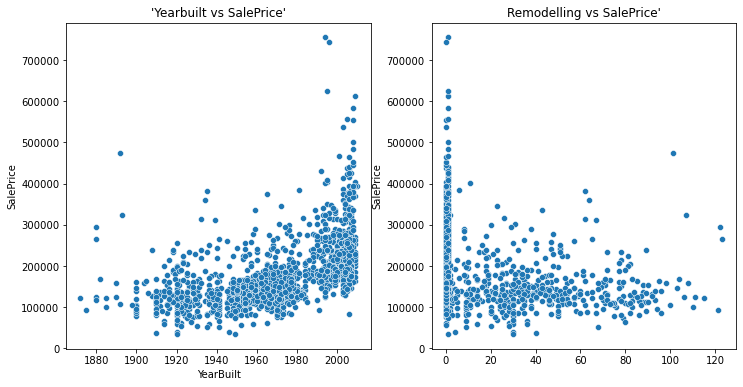

In [14]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
k=df_train.YearRemodAdd-df_train.YearBuilt
sns.scatterplot(data=df_train,ax=axes[0],x='YearBuilt',y='SalePrice').set_title("'Yearbuilt vs SalePrice'")
sns.scatterplot(data=df_train,ax=axes[1],x=k,y='SalePrice').set_title("Remodelling vs SalePrice'")


Text(0.5, 1.0, "sold vs SalePrice'")

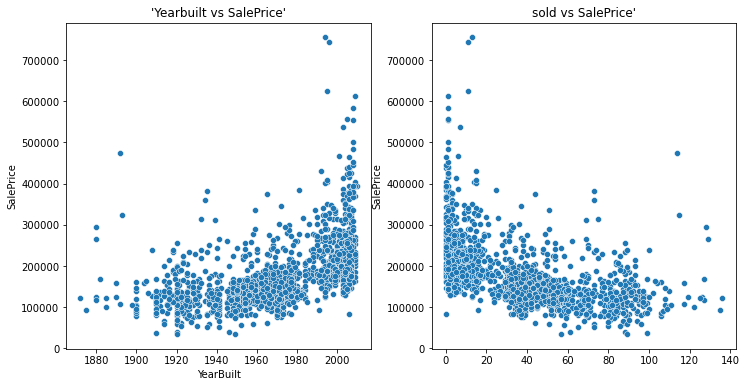

In [15]:
fig, axes = plt.subplots(1,2,figsize=(12,6))
k=df_train.YrSold-df_train.YearBuilt
sns.scatterplot(data=df_train,ax=axes[0],x='YearBuilt',y='SalePrice').set_title("'Yearbuilt vs SalePrice'")
sns.scatterplot(data=df_train,ax=axes[1],x=k,y='SalePrice').set_title("sold vs SalePrice'")


In [16]:
total=df_train.isnull().sum().sort_values(ascending=False)
percent=(df_train.isnull().sum()/df_train.shape[0]).sort_values(ascending=False)
missing_val=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_val.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [17]:
ytr=df_train.SalePrice.values
xtr=df_train.drop('SalePrice',axis=1)

In [18]:

xtr=xtr.drop((missing_val[missing_val['Percent']>0.15]).index,1)
xtr = xtr.apply(lambda x:x.fillna(x.value_counts().index[0]))
xtr.isnull().sum().max()

0

In [19]:
total=df_test.isnull().sum().sort_values(ascending=False)
percent=(df_test.isnull().sum()/df_test.shape[0]).sort_values(ascending=False)
missing_val=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_val.head(20)
df_test=df_test.drop(missing_val[missing_val['Percent']>0.15].index,1)
df_test = df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_test.isnull().sum().max()

0

In [20]:


indexes1 = xtr[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index 
indexes2 = xtr[(df_train['GrLivArea']>5000) | (df_train['SalePrice']>500000)].index



In [21]:
print("Length of data before dropping outliers:", len(xtr))
xtr= xtr.drop(indexes1)
ytr=np.delete(ytr, indexes1)
print("Length of data after dropping outliers:", len(xtr))

Length of data before dropping outliers: 1460
Length of data after dropping outliers: 1458


In [22]:

xtr['New'] = xtr['OverallQual'] * xtr['GarageArea'] * xtr['GrLivArea']
df_test['New'] = df_test['OverallQual'] * df_test['GarageArea'] * df_test['GrLivArea']


In [23]:
df_test=df_test[xtr.columns]
xtr.drop('Id',axis=1,inplace=True)
df_test.drop('Id',axis=1, inplace=True)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   Utilities      1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  YearBuilt      1459 non-null   int64  
 17  YearRemodAdd   1459 non-null   int64  
 18  RoofStyl

In [24]:
df_all=pd.concat((xtr,df_test)).reset_index(drop=True)
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2917 non-null   int64  
 1   MSZoning       2917 non-null   object 
 2   LotArea        2917 non-null   int64  
 3   Street         2917 non-null   object 
 4   LotShape       2917 non-null   object 
 5   LandContour    2917 non-null   object 
 6   Utilities      2917 non-null   object 
 7   LotConfig      2917 non-null   object 
 8   LandSlope      2917 non-null   object 
 9   Neighborhood   2917 non-null   object 
 10  Condition1     2917 non-null   object 
 11  Condition2     2917 non-null   object 
 12  BldgType       2917 non-null   object 
 13  HouseStyle     2917 non-null   object 
 14  OverallQual    2917 non-null   int64  
 15  OverallCond    2917 non-null   int64  
 16  YearBuilt      2917 non-null   int64  
 17  YearRemodAdd   2917 non-null   int64  
 18  RoofStyl

In [25]:
from sklearn.linear_model import LinearRegression,ElasticNet,Lasso,BayesianRidge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator,TransformerMixin, RegressorMixin, clone
from lightgbm import LGBMRegressor
import xgboost as xgb

In [26]:
xtr.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
df_test.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
from sklearn.preprocessing import LabelEncoder
cols = xtr.select_dtypes(include='object').columns

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(xtr[c].values)) 
    xtr[c] = lbl.transform(list(xtr[c].values))
    

print('Shape all_data: {}'.format(xtr.shape))

Shape all_data: (1458, 74)


In [29]:
from sklearn.preprocessing import LabelEncoder
cols = df_test.select_dtypes(include='object').columns

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df_test[c].values)) 
    df_test[c] = lbl.transform(list(df_test[c].values))

print('Shape all_data: {}'.format(df_test.shape))



Shape all_data: (1459, 74)


In [30]:
df_test.select_dtypes(include='object').columns

Index([], dtype='object')

In [31]:
df_result=pd.DataFrame(columns=['Model','RMSE','MSE','Summary'])

In [32]:
X=xtr[['OverallQual','GrLivArea']]
y=ytr

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

lrmodel=LinearRegression()
lrmodel.fit(x_train,y_train)
lr_pred=lrmodel.predict(x_test)

mse=mean_squared_error(y_test,lr_pred)
rmse=np.sqrt(mean_squared_error(y_test,lr_pred))
df_result=df_result.append(pd.DataFrame([["Linear Regression",rmse,mse,"BaseLine Model"]],columns=df_result.columns))
print(df_result)

               Model         RMSE           MSE         Summary
0  Linear Regression  39810.56634  1.584881e+09  BaseLine Model


In [33]:
X=xtr[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','LotArea', 'YearRemodAdd', 'YearBuilt','FullBath']]
y=ytr

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

RFmodel=RandomForestRegressor()
RFmodel.fit(x_train,y_train)
RF_pred=RFmodel.predict(x_test)

mse=mean_squared_error(y_test,RF_pred)
rmse=np.sqrt(mean_squared_error(y_test,RF_pred))
df_result=df_result.append(pd.DataFrame([["RF Regression",rmse,mse,"RF Model 2"]],columns=df_result.columns))

importances=RFmodel.feature_importances_

indices=np.argsort(importances)[::-1]



print(df_result)

               Model          RMSE           MSE         Summary
0  Linear Regression  39810.566340  1.584881e+09  BaseLine Model
0      RF Regression  27677.010167  7.660169e+08      RF Model 2


In [34]:
X=xtr[['New', 'TotalBsmtSF', 'BsmtFinSF1', 'OverallQual', 'GrLivArea', '1stFlrSF', 'LotArea', 'YearRemodAdd', 'YearBuilt', 'GarageArea','FullBath']]
y=ytr

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [35]:
lgb_Model=LGBMRegressor()
lgb_Model.fit(x_train,y_train)
y_pred_lgb = lgb_Model.predict(x_test)

mse = mean_squared_error(y_test, y_pred_lgb)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
df_result=df_result.append(pd.DataFrame([["lgb Regression",rmse,mse,"LGBM"]],columns=df_result.columns))
print(df_result)



               Model          RMSE           MSE         Summary
0  Linear Regression  39810.566340  1.584881e+09  BaseLine Model
0      RF Regression  27677.010167  7.660169e+08      RF Model 2
0     lgb Regression  24942.238071  6.221152e+08            LGBM


In [36]:
features=['New', 'TotalBsmtSF', 'BsmtFinSF1', 'OverallQual', 'GrLivArea', '1stFlrSF', 'LotArea', 'YearRemodAdd', 'YearBuilt', 'GarageArea','FullBath']

In [37]:
X_test = df_all.iloc[len(xtr):len(df_all)]
y_pred_lgb_tuned = lgb_Model.predict(X_test[features])


In [38]:
model_xgb=xgb.XGBRegressor(n_estimators=2200)

In [39]:
n_folds=5
def rmsle(model):
    kf=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


In [40]:
print(xtr.shape)
print(ytr.shape)
print(df_test.shape)


(1458, 74)
(1458,)
(1459, 74)


In [41]:
model_xgb.fit(xtr,ytr)
xgb_train_predict=model_xgb.predict(xtr)
xgb_predict=model_xgb.predict(df_test)
print(rmsle(ytr,xgb_train_predict))

0.053251059694702355


In [42]:
sub = pd.DataFrame()
sub['Id'] = ids
sub['SalePrice'] = xgb_predict
sub.to_csv('submission.csv',index=False)

from sklearn.model_selection import GridSearchCV
params= {'min_child_weight':[4,5], 'gamma':[i/10.0 for i in range(3,6)], 'subsample':[i/10.0 for i in range(6,11)], 'colsample_bytree':[i/10.0 for i in range(4,11)], 'max_depth':[2,3,4], 'reg_lambda':[i/10.0 for i in range(7,9)],'reg_alpha':[i/10.0 for i in range(4,7)]}
model = xgb.XGBRegressor(nthread=-1)

grid=GridSearchCV(model,params)
grid.fit(xtr,ytr)

xgb_train_pred = grid.best_estimator_.predict(xtr)
xgb_pred = grid.best_estimator_.predict(df_test)
print(rmsle(ytr, xgb_train_pred))

In [43]:



class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

                
                

In [44]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, random_state =42)

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005,random_state=42))
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=42))

stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)


In [45]:
xtr.to_numpy()



array([[6.000000e+01, 3.000000e+00, 8.450000e+03, ..., 8.000000e+00,
        4.000000e+00, 6.559560e+06],
       [2.000000e+01, 3.000000e+00, 9.600000e+03, ..., 8.000000e+00,
        4.000000e+00, 3.483120e+06],
       [6.000000e+01, 3.000000e+00, 1.125000e+04, ..., 8.000000e+00,
        4.000000e+00, 7.601216e+06],
       ...,
       [7.000000e+01, 3.000000e+00, 9.042000e+03, ..., 8.000000e+00,
        4.000000e+00, 4.127760e+06],
       [2.000000e+01, 3.000000e+00, 9.717000e+03, ..., 8.000000e+00,
        4.000000e+00, 1.293600e+06],
       [2.000000e+01, 3.000000e+00, 9.937000e+03, ..., 8.000000e+00,
        4.000000e+00, 1.733280e+06]])

In [46]:
xtr=pd.DataFrame(xtr)
ytr=pd.DataFrame(ytr)

In [47]:
xtr.iloc[439]

MSSubClass            50.0
MSZoning               3.0
LotArea            12354.0
Street                 1.0
LotShape               3.0
                   ...    
MoSold                 8.0
YrSold              2009.0
SaleType               4.0
SaleCondition          4.0
New              3788928.0
Name: 439, Length: 74, dtype: float64

In [48]:
import lightgbm as lgb
model_xgb = xgb.XGBRegressor(n_estimators=2200, nthread = -1)
model_xgb.fit(xtr, ytr)

model_lgb = lgb.LGBMRegressor(objective='regression',n_estimators=720)
model_lgb.fit(xtr, ytr)

stacked_averaged_models.fit(xtr.values, ytr)

KeyError: '[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22, 24, 25, 26, 27, 30, 31, 33, 35, 36, 40, 41, 43, 44, 45, 46, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 70, 72, 73, 74, 76, 77, 78, 79, 80, 81, 82, 83, 84, 86, 87, 90, 91, 92, 93, 94, 95, 98, 99, 100, 101, 102, 104, 105, 106, 107, 110, 112, 114, 115, 116, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 167, 168, 169, 170, 171, 172, 173, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 195, 197, 199, 200, 201, 203, 204, 205, 206, 209, 210, 211, 212, 214, 215, 216, 217, 219, 220, 221, 222, 224, 225, 227, 228, 229, 230, 231, 232, 234, 236, 237, 238, 240, 241, 244, 245, 246, 247, 248, 250, 251, 252, 254, 255, 256, 257, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 283, 285, 286, 288, 289, 290, 291, 292, 294, 295, 296, 297, 298, 299, 300, 302, 303, 304, 305, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 320, 321, 322, 324, 326, 327, 330, 331, 332, 333, 334, 335, 337, 338, 339, 340, 341, 343, 344, 345, 346, 347, 348, 350, 351, 352, 353, 354, 355, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 373, 374, 375, 377, 378, 379, 381, 383, 384, 385, 386, 387, 388, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 402, 403, 404, 405, 409, 410, 411, 412, 413, 415, 416, 417, 419, 420, 421, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 436, 437, 438, 439, 440, 441, 442, 443, 445, 446, 447, 448, 449, 450, 451, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 466, 467, 468, 469, 471, 472, 473, 474, 475, 476, 478, 479, 480, 482, 483, 485, 488, 489, 491, 492, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 508, 509, 510, 511, 512, 513, 514, 515, 516, 519, 520, 521, 523, 524, 525, 526, 527, 528, 529, 530, 532, 533, 534, 535, 536, 537, 539, 541, 542, 543, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 557, 558, 559, 560, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 573, 574, 575, 576, 579, 581, 582, 584, 585, 586, 587, 588, 589, 590, 592, 593, 596, 597, 598, 599, 600, 603, 604, 606, 607, 608, 609, 610, 612, 613, 614, 615, 617, 618, 620, 621, 623, 624, 625, 626, 627, 630, 631, 632, 634, 635, 636, 637, 639, 640, 641, 642, 643, 644, 646, 647, 648, 649, 651, 652, 653, 654, 655, 656, 657, 659, 661, 662, 663, 664, 665, 666, 667, 669, 670, 671, 672, 673, 674, 675, 676, 677, 679, 680, 681, 682, 683, 684, 685, 686, 687, 688, 689, 691, 693, 694, 695, 696, 697, 698, 699, 700, 701, 702, 703, 704, 706, 707, 708, 709, 710, 711, 712, 713, 714, 715, 716, 718, 719, 720, 721, 723, 724, 725, 727, 728, 729, 730, 731, 732, 733, 734, 735, 737, 739, 741, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 758, 759, 760, 761, 762, 763, 764, 765, 767, 768, 769, 770, 771, 772, 775, 777, 778, 779, 780, 781, 783, 784, 786, 788, 789, 790, 791, 792, 793, 794, 795, 796, 798, 800, 801, 802, 803, 804, 806, 807, 808, 809, 810, 811, 812, 813, 815, 817, 818, 819, 820, 821, 824, 825, 826, 827, 828, 830, 833, 834, 835, 837, 838, 839, 840, 841, 842, 843, 844, 846, 847, 849, 850, 852, 853, 854, 855, 856, 857, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 874, 875, 876, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 896, 897, 898, 900, 901, 902, 904, 905, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 940, 941, 943, 944, 945, 946, 948, 949, 951, 952, 953, 954, 955, 956, 957, 958, 960, 961, 962, 967, 968, 970, 971, 972, 973, 975, 976, 977, 978, 979, 981, 982, 983, 984, 985, 986, 987, 989, 990, 992, 993, 994, 996, 997, 998, 999, 1001, 1004, 1006, 1008, 1009, 1011, 1012, 1013, 1015, 1016, 1017, 1020, 1021, 1022, 1023, 1026, 1027, 1028, 1029, 1032, 1033, 1034, 1035, 1036, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1051, 1052, 1055, 1057, 1058, 1059, 1060, 1061, 1064, 1066, 1067, 1068, 1069, 1070, 1071, 1073, 1074, 1075, 1076, 1078, 1079, 1080, 1082, 1083, 1084, 1085, 1086, 1087, 1088, 1089, 1090, 1092, 1093, 1094, 1095, 1096, 1097, 1098, 1099, 1100, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1111, 1112, 1113, 1114, 1115, 1116, 1119, 1120, 1122, 1123, 1125, 1127, 1128, 1129, 1130, 1132, 1133, 1134, 1135, 1137, 1138, 1139, 1141, 1142, 1144, 1145, 1146, 1147, 1148, 1150, 1151, 1152, 1153, 1154, 1157, 1158, 1159, 1160, 1161, 1163, 1164, 1166, 1167, 1169, 1170, 1171, 1172, 1175, 1178, 1180, 1181, 1182, 1185, 1186, 1187, 1188, 1189, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1200, 1202, 1203, 1205, 1206, 1207, 1208, 1209, 1210, 1211, 1212, 1213, 1214, 1217, 1219, 1220, 1222, 1224, 1225, 1226, 1227, 1228, 1229, 1232, 1233, 1235, 1237, 1238, 1240, 1241, 1242, 1243, 1244, 1245, 1246, 1249, 1250, 1252, 1253, 1254, 1255, 1257, 1258, 1259, 1260, 1261, 1263, 1264, 1265, 1266, 1267, 1268, 1269, 1271, 1272, 1273, 1274, 1275, 1276, 1277, 1278, 1279, 1281, 1282, 1283, 1284, 1285, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1306, 1307, 1308, 1310, 1312, 1313, 1314, 1315, 1316, 1317, 1319, 1321, 1322, 1324, 1325, 1326, 1327, 1328, 1329, 1330, 1332, 1334, 1335, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1355, 1356, 1357, 1359, 1360, 1362, 1363, 1364, 1366, 1367, 1368, 1370, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1385, 1387, 1388, 1390, 1391, 1393, 1394, 1395, 1396, 1398, 1399, 1401, 1402, 1403, 1404, 1405, 1406, 1407, 1409, 1410, 1412, 1413, 1415, 1416, 1417, 1418, 1420, 1421, 1423, 1425, 1426, 1427, 1430, 1431, 1432, 1435, 1436, 1437, 1438, 1439, 1440, 1442, 1443, 1444, 1445, 1446, 1447, 1449, 1450, 1451, 1453, 1454, 1455, 1456, 1457] not in index'

In [49]:
lgb_pred = model_lgb.predict(df_test)
xgb_pred = model_xgb.predict(df_test)
stacked_pred = stacked_averaged_models.predict(df_test.values)
ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15


NotFittedError: This RobustScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [50]:
sub = pd.DataFrame()
sub['Id'] = ids
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

NameError: name 'ensemble' is not defined